# Tutorial 5

## Suppport Vector Machines


In [45]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

import warnings
warnings.filterwarnings('ignore')
from IPython.html.widgets import interact

In [46]:
# PLOTTING CODE THAT WAS WRITTEN SO YOU DON"T HAVE TO

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    


# Classification

Last week, we looked at a way to classify data by drawing a line through our data which divided it into $n$ classes. For the case of 2 classes, we used Ordinary Least Squares to learn a line *"decision boundry"* that divided the data. 


## Linear Classification with 2 classes

<img src="linear-classifyer.png">

Once we learn the decision boundry, we can classify any new points accourding to their values for x and y. 

## Finding an Optimal Decision Boundry

For some datasets, we can many valid decision boundies. How do we know which one to pick? 

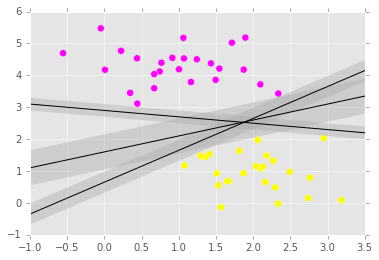

In [47]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Which decision bounrdy do we want to use? We see that all 3 options are perfect decision boundries. We probably want to go with $H_2$ because it "leaves the most room on both sides".

This concept is called an "optimal margin decision boundry". Now the question is, how do we find an optimal margin decision boundry for an arbitrary data set. 

# The Support Vector Machine

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs draw a boundary between clusters of data. SVMs attempt to maximize the margin between sets of points.

In [48]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Linear Kernel SVM

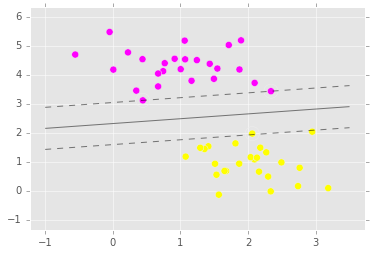

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none')

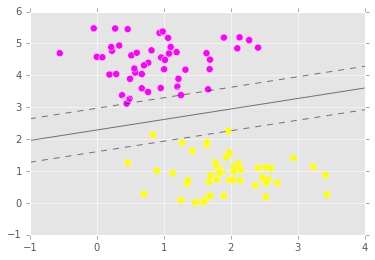

In [50]:
interact(plot_svm, N=[10, 200], kernel='linear');

## Non Linear Seperable Data

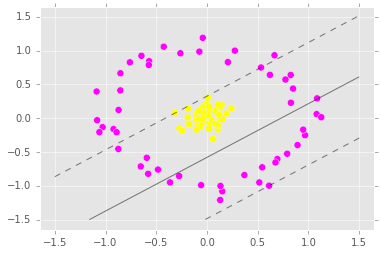

In [51]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

Here we see a dataset that is not linearly seperable. But we can imagine a perfect decision boundry in the form of a circle. It turns out that circles are hard to implement in SVM's so we're going to try a different approch. 

Let's project this data into 3 dimenssion, sand rais the yellow points above the purple points. We can then imagine a decision boundry in the shape of a plane that perfectly classifys the data. This is called using a "polynomial kernel" which projects the data into a higher dimension, but negates the computational cost of increased dimensionality. 

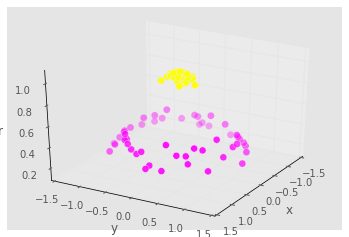

In [52]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

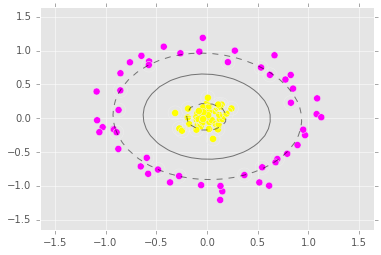

In [53]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

When we project the data and decision boundry back into 2 dimensions in makes a circle! And it perfectly classifies the data.

## Other Kernel Options

### Kernel Selection with the Iris Dataset
<img src="svm-iris.png">

## Discussion Questions

1. Are SVM's the universal classifier? What might their advantages be? Disadvantages?
2. Are SVM's insulated from overfitting?
3. What do we do if the data isn't perfectly seperable"